# Assignment- 11- You have been provided with a dataset of 300 places collected by a taxi company. Each location is associated with a two-dimensional point that represents longitude and latitude. For example, ‘-112.1, 33.5’ means the longitude is -112.1 and the latitude is 33.5.

 

# Using the pairs of latitude and longitude, find location clusters, using k-means clustering, Agglomerative clustering, DBSCAN clustering, and Gaussian Mixture Model.
# Using genetic and simulated annealing algorithms, find the shortest path between places within cluster from 1 (choose the cluster algorithm with the highest Silhouette score).


In [1]:
!pip install --upgrade kneed

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kneed import KneeLocator

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

%matplotlib inline 

In [3]:
df = pd.read_csv('places.csv')
df.head()

,Unnamed: 0,longitude,latitude
0,0,-112.070792,33.451625
1,1,-112.065542,33.449298
2,2,-112.073931,33.456491
3,3,-112.074866,33.470115
4,4,-80.525690,43.477099


In [4]:
ms_df = df[['longitude','latitude']]
ms_df.head()

,longitude,latitude
0,-112.070792,33.451625
1,-112.065542,33.449298
2,-112.073931,33.456491
3,-112.074866,33.470115
4,-80.525690,43.477099


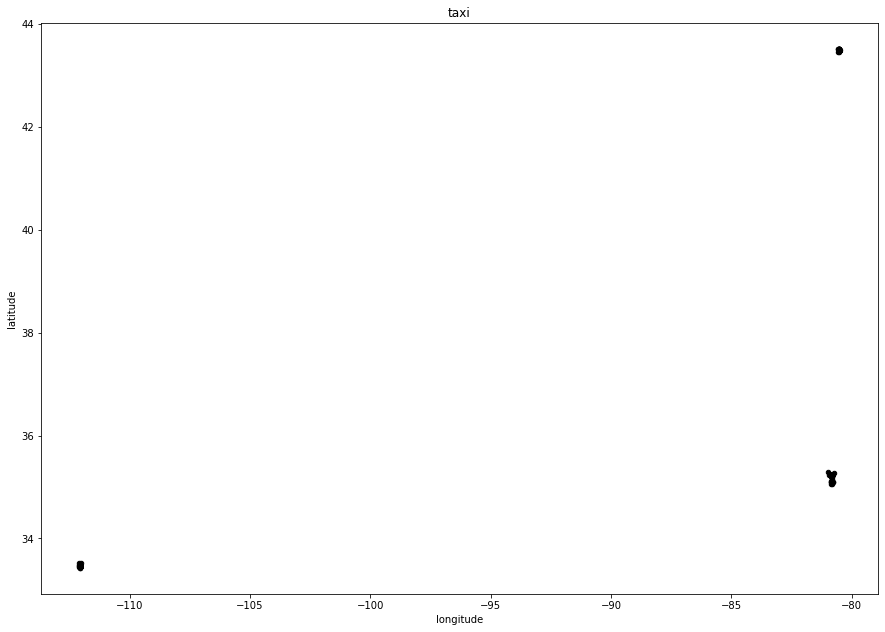

In [5]:
# plots our data
msplot = ms_df.plot.scatter(x='longitude',y='latitude',c='Black',title="taxi",figsize=(15,10.5))
msplot.set_xlabel("longitude")
msplot.set_ylabel("latitude")
plt.show()

In [6]:
# scales our data
preprocessor = preprocessing.StandardScaler().fit(ms_df)
ms_df_transforemd = preprocessor.transform(ms_df)

In [7]:
scaled_df = pd.DataFrame(ms_df_transforemd,  columns = ms_df.columns)

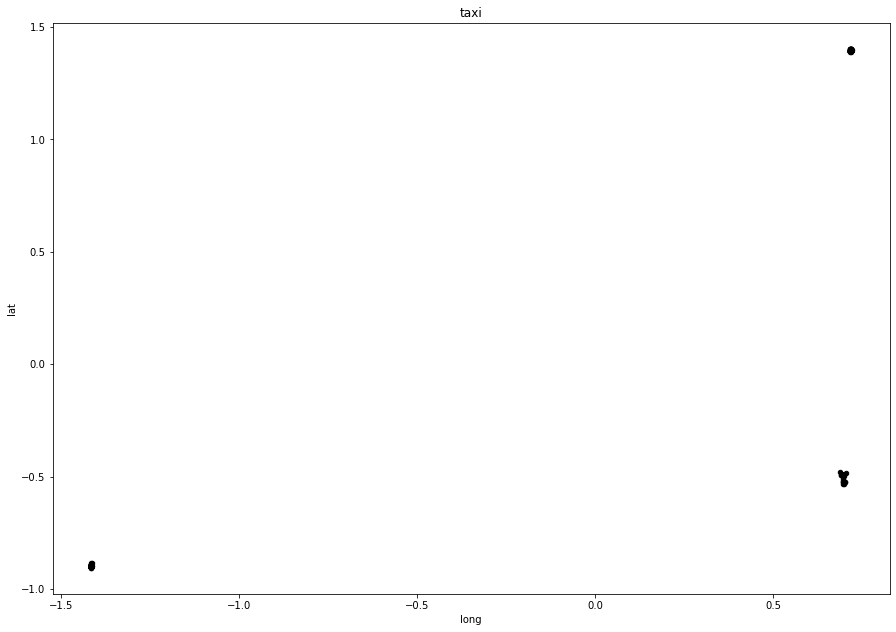

In [8]:
# plots our data
msplot = scaled_df.plot.scatter(x='longitude',y='latitude',c='Black',title="taxi",figsize=(15,10.5))
msplot.set_xlabel("long")
msplot.set_ylabel("lat")
plt.show()

# Clustering Algorithms

In [9]:
from sklearn.cluster import KMeans
wss = []
inti_K = 4
End_K = 14
for i in range(inti_K,End_K):
    fitx = KMeans(n_clusters=i, n_init=6, random_state=112).fit(scaled_df)
    wss.append(fitx.inertia_)

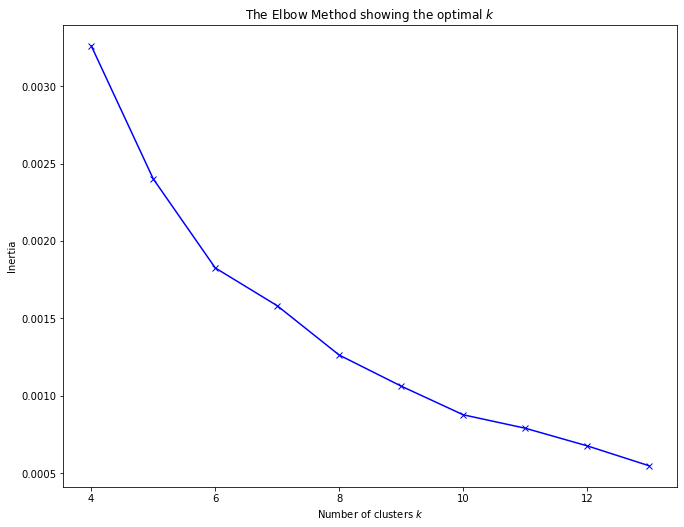

In [10]:
plt.figure(figsize=(11,8.5))
plt.plot(range(inti_K,End_K), wss, 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal $k$')
plt.show()

In [11]:

from kneed import KneeLocator
kl = KneeLocator(
    range(inti_K, End_K), wss, curve="convex", direction="decreasing")
kl.elbow

8

In [12]:
kl.elbow

8

In [13]:
# from sklearn.cluster import KMeans
ms_kmeans = KMeans(n_clusters=kl.elbow, random_state=112, verbose=1).fit(scaled_df)

Initialization complete
Iteration 0, inertia 0.0017897399431936255
Converged at iteration 0: center shift 3.414255868319148e-05 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 0.0018562087350913019
Converged at iteration 0: center shift 2.214259426643457e-05 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 0.001709699933897797
Converged at iteration 0: center shift 9.938998579542948e-06 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 0.0016231664530437938
Converged at iteration 0: center shift 1.2404315303896175e-05 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 0.0015950681602311919
Converged at iteration 0: center shift 1.7222197334595684e-05 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 0.0017017977713569745
Converged at iteration 0: center shift 5.9359231046554724e-05 within tolerance 9.99999999999

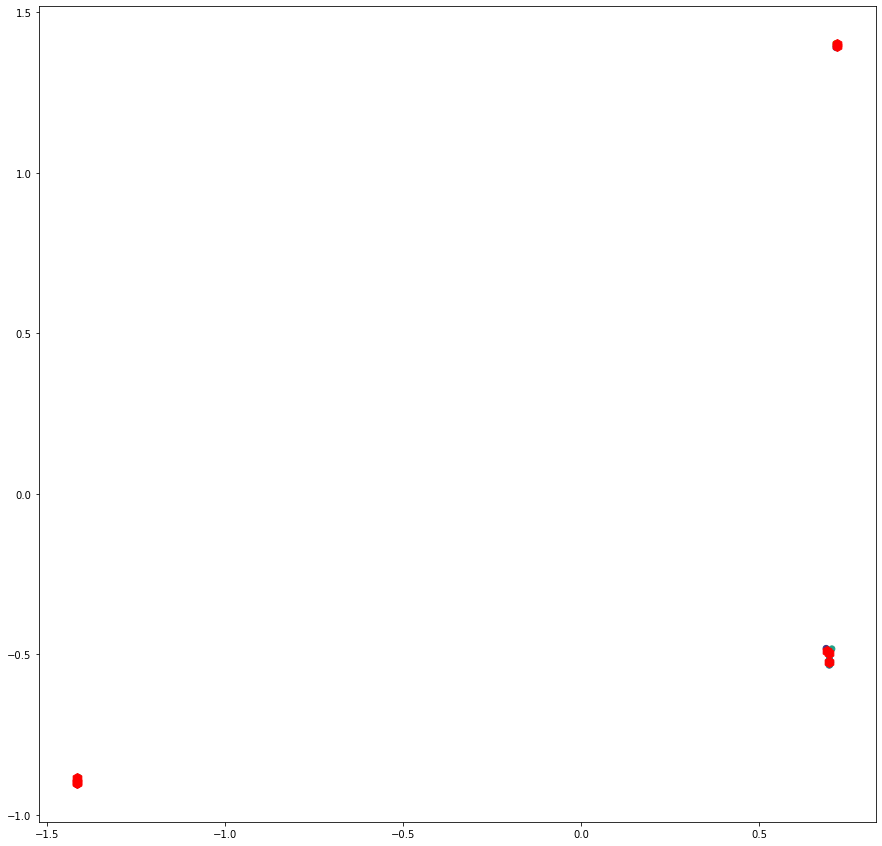

In [14]:
plt.figure(figsize=(15,15))
plt.scatter(scaled_df['longitude'],scaled_df['latitude'], c=ms_kmeans.labels_);
plt.scatter(ms_kmeans.cluster_centers_[:,0],ms_kmeans.cluster_centers_[:,1], c='r', marker='h', s=100);

In [15]:
ms_kmeans.labels_

array([0, 0, 0, 7, 2, 2, 4, 0, 0, 4, 0, 4, 2, 7, 4, 4, 4, 7, 1, 2, 6, 2,
       6, 4, 0, 2, 0, 2, 7, 7, 6, 4, 0, 0, 7, 4, 2, 0, 2, 4, 4, 4, 4, 4,
       4, 2, 7, 4, 0, 7, 2, 4, 0, 3, 2, 4, 7, 3, 2, 4, 0, 2, 4, 7, 2, 4,
       4, 0, 2, 4, 2, 0, 4, 2, 7, 7, 0, 4, 2, 0, 7, 4, 7, 2, 0, 5, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 6, 4, 4, 5, 0, 0, 2, 0, 0, 4, 4, 0, 2, 0, 0,
       2, 4, 7, 2, 0, 0, 2, 0, 2, 2, 4, 4, 7, 2, 3, 2, 4, 2, 4, 2, 4, 6,
       4, 0, 0, 2, 2, 0, 7, 2, 4, 4, 0, 2, 4, 4, 4, 7, 4, 3, 2, 4, 4, 2,
       2, 2, 2, 2, 3, 3, 6, 7, 6, 0, 4, 6, 2, 2, 2, 6, 2, 0, 7, 1, 4, 0,
       2, 4, 4, 2, 7, 2, 4, 4, 2, 4, 4, 2, 0, 2, 4, 4, 7, 0, 7, 4, 7, 0,
       4, 7, 2, 7, 4, 7, 2, 1, 7, 6, 4, 4, 2, 4, 4, 0, 2, 2, 7, 2, 7, 2,
       7, 2, 2, 2, 4, 4, 4, 0, 3, 7, 0, 4, 4, 2, 6, 4, 0, 4, 0, 4, 7, 0,
       4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 2, 2, 2, 2, 4, 0, 4, 7, 2, 0, 4, 6,
       2, 5, 2, 0, 2, 0, 6, 4, 0, 4, 2, 2, 0, 0, 2, 2, 4, 4, 4, 4, 2, 2,
       4, 6, 2, 7, 6, 7, 3, 7, 2, 7, 7, 7, 2, 7])

# Quality of Silhouette

In [16]:
# Check with more k
from sklearn.metrics import silhouette_score
inti_K = 4
End_K = 14
scores = [0]
for i in range(inti_K+1,End_K):
    fitx = KMeans(n_clusters=i, n_init=6, random_state=112).fit(scaled_df)
    score = silhouette_score(scaled_df, fitx.labels_)
    scores.append(score)

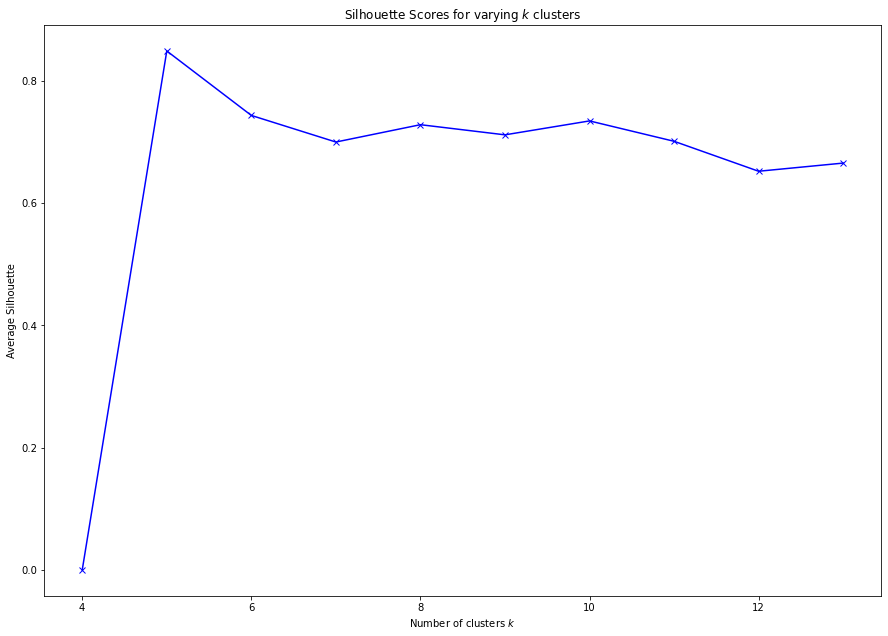

In [17]:
plt.figure(figsize=(15,10.5))
plt.plot(range(inti_K,End_K), np.array(scores), 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Average Silhouette')
plt.title('Silhouette Scores for varying $k$ clusters')
plt.show()

# Agglomerative Clustering

# Code (via scipy)

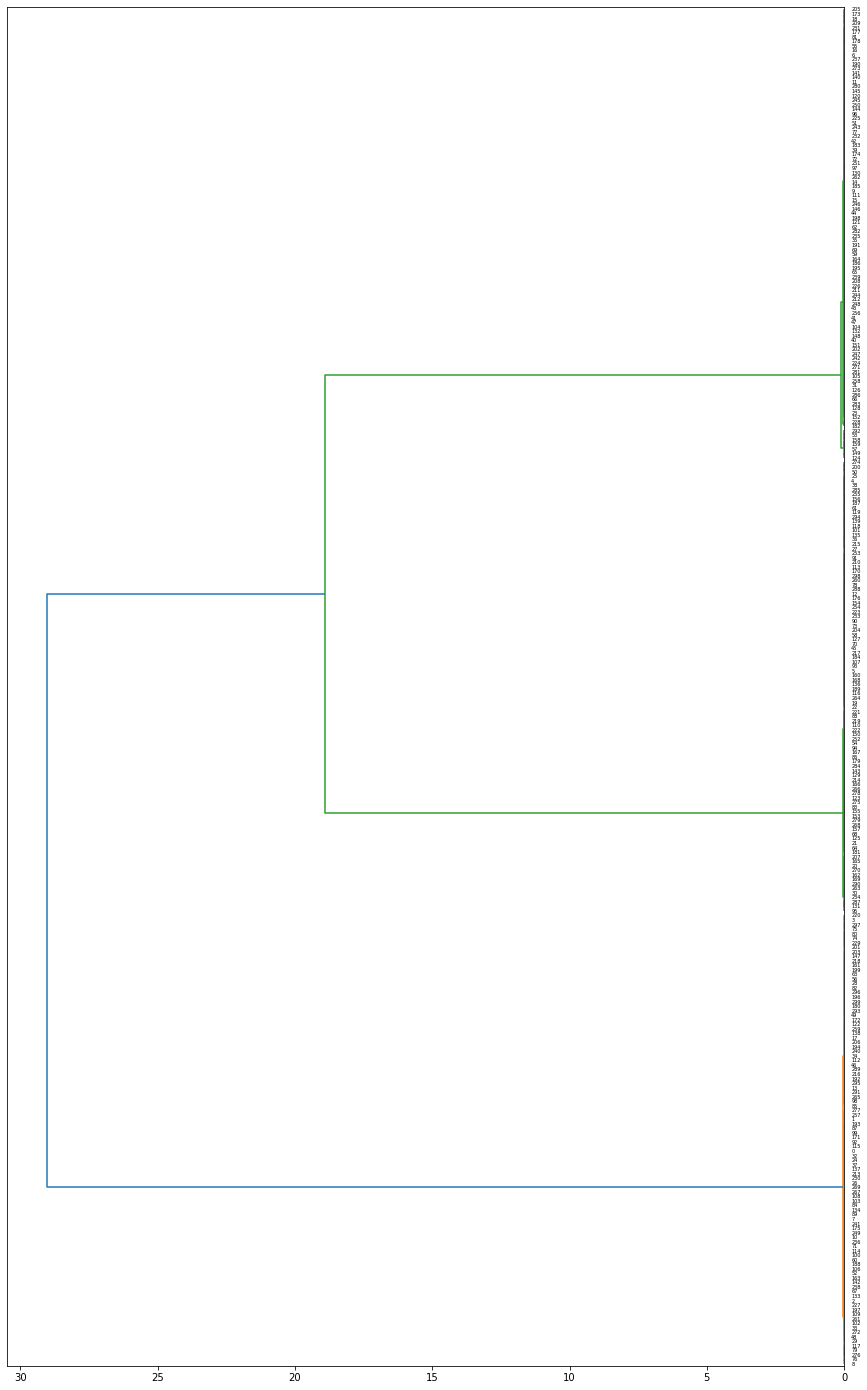

In [18]:
import scipy.cluster.hierarchy as hac
from scipy.spatial.distance import pdist

plt.figure(figsize=(15,25))
dist_mat = pdist(scaled_df, metric="euclidean")
ward_data = hac.ward(dist_mat)
hac.dendrogram(ward_data, orientation='left', leaf_font_size=5);

In [19]:
from sklearn.cluster import AgglomerativeClustering

Agglomerativecluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Agglomerativecluster.fit_predict(scaled_df)

array([4, 4, 4, 2, 0, 0, 1, 4, 4, 1, 4, 1, 0, 2, 1, 1, 1, 2, 1, 0, 0, 0,
       0, 1, 4, 0, 4, 0, 2, 4, 0, 1, 4, 4, 2, 1, 0, 4, 0, 1, 1, 1, 1, 1,
       1, 0, 2, 1, 4, 2, 0, 1, 4, 3, 0, 1, 2, 3, 0, 1, 4, 0, 1, 2, 0, 1,
       1, 4, 0, 1, 0, 4, 1, 0, 2, 2, 4, 1, 0, 4, 2, 1, 2, 0, 4, 2, 0, 4,
       0, 4, 0, 0, 4, 0, 0, 0, 1, 1, 2, 4, 4, 0, 4, 4, 1, 1, 4, 0, 4, 4,
       0, 1, 2, 0, 4, 4, 0, 4, 0, 0, 1, 1, 2, 0, 3, 0, 1, 0, 1, 0, 1, 0,
       1, 4, 4, 0, 0, 4, 2, 0, 1, 1, 4, 0, 1, 1, 1, 2, 1, 3, 0, 1, 1, 0,
       0, 0, 0, 0, 3, 3, 0, 2, 0, 4, 1, 0, 0, 0, 0, 0, 0, 4, 2, 1, 1, 4,
       0, 1, 1, 0, 2, 0, 1, 1, 0, 1, 1, 0, 4, 0, 1, 1, 2, 4, 2, 1, 2, 4,
       1, 2, 0, 2, 1, 2, 0, 1, 2, 0, 1, 1, 0, 1, 1, 4, 0, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 1, 1, 1, 4, 1, 2, 4, 1, 1, 0, 0, 1, 4, 1, 4, 1, 2, 4,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 0, 0, 0, 0, 1, 4, 1, 2, 0, 4, 1, 0,
       0, 2, 0, 4, 0, 4, 0, 1, 4, 1, 0, 0, 4, 4, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 2, 0, 2, 3, 2, 0, 2, 2, 2, 0, 2], d

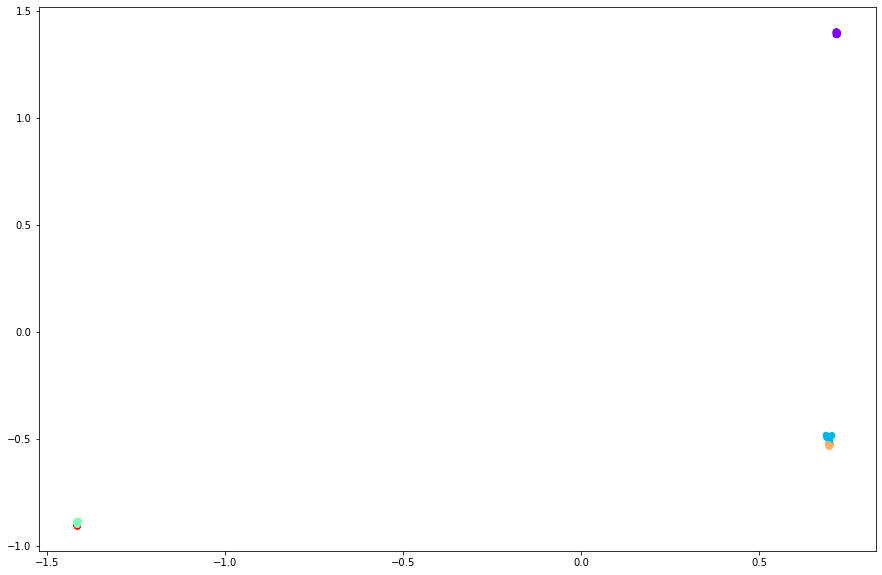

In [20]:
plt.figure(figsize=(15, 10))
data = scaled_df.values
plt.scatter(data[:,0], data[:,1], c=Agglomerativecluster.labels_, cmap='rainbow')

# Quality of Clusters: Silhouette

In [21]:
silhouette_score(scaled_df, Agglomerativecluster.labels_)

0.8476044172896635

# DBscan Clustering

# Code (via sklearn)

In [22]:
from sklearn.cluster import DBSCAN
fitted_dbscan = DBSCAN(eps=0.5).fit(scaled_df)

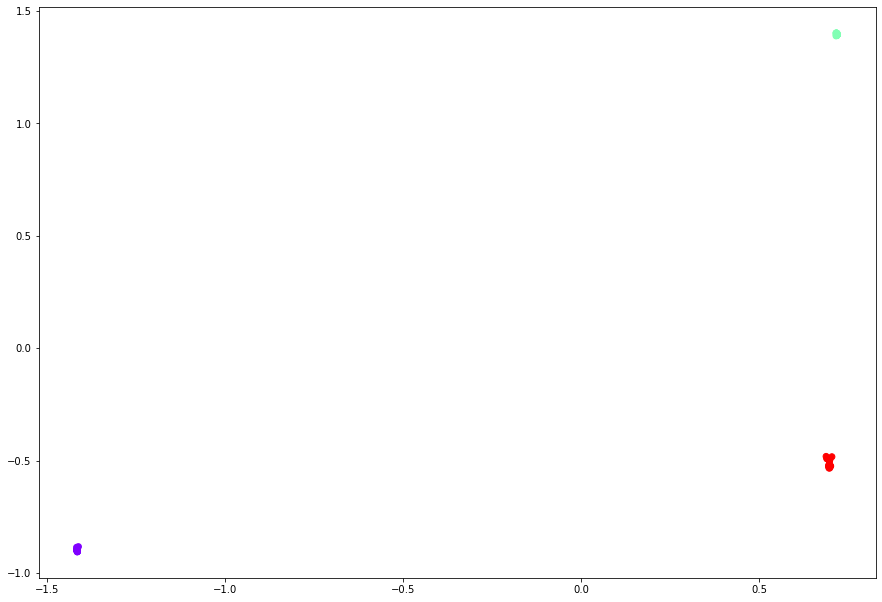

In [23]:
plt.figure(figsize=(15, 10.5))
data = scaled_df.values
plt.scatter(data[:,0], data[:,1], c=fitted_dbscan.labels_, cmap='rainbow')

In [24]:
silhouette_score(scaled_df, fitted_dbscan.labels_)

0.9977041776728723

In [25]:
fitted_dbscan.labels_

array([0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 1,
       1, 2, 0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 1, 0, 1, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 1, 2, 0, 1, 2,
       2, 0, 1, 2, 1, 0, 2, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 1, 0, 0,
       1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0,
       1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 0, 0, 0, 2, 0, 0,
       2, 0, 1, 0, 2, 0, 1, 2, 0, 1, 2, 2, 1, 2, 2, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 2, 0, 2, 0, 1, 0, 2, 1,
       1, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1,
       2, 1, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0], d

In [26]:
testdf = ms_df.copy()
testdf['cluster_label'] = fitted_dbscan.labels_
testdf.head(20)

,longitude,latitude,cluster_label
0,-112.070792,33.451625,0
1,-112.065542,33.449298,0
2,-112.073931,33.456491,0
3,-112.074866,33.470115,0
4,-80.525690,43.477099,1
5,-80.526641,43.485875,1
6,-80.846495,35.225825,2
7,-112.074428,33.448491,0
8,-112.073101,33.429907,0
9,-80.839636,35.227054,2


In [27]:
ms_df.head()

,longitude,latitude
0,-112.070792,33.451625
1,-112.065542,33.449298
2,-112.073931,33.456491
3,-112.074866,33.470115
4,-80.525690,43.477099


In [39]:
ms_df=df.copy()
ms_df['cluster_labels']=fitted_dbscan.labels_
clusters=ms_df['cluster_labels'].unique()

In [41]:
# Start with the first claster
cluster = clusters[1]
num_points = len(ms_df[ms_df['cluster_labels'] == cluster])

num_points


100

In [43]:
points_coordinate = ms_df[ms_df['cluster_labels'] == cluster][['longitude','latitude']]

In [44]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
import math



distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')


def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

# Genetic Algorithm for TSP

In [45]:
!pip install sko

In [46]:
from sko.GA import GA_TSP

ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=50, max_iter=500, prob_mut=1)
best_points, best_distance = ga_tsp.run()

In [48]:
best_points

array([33, 82, 42, 34, 52, 27, 57, 71, 10, 94, 11, 66, 89, 50,  7, 36, 99,
       20, 12, 19, 26, 31, 25, 76,  0, 86, 24, 40, 17, 18, 14, 75, 74, 45,
       73, 46, 61, 28, 23, 32, 38, 92, 70, 87, 55, 56, 93, 51,  5, 79, 49,
       47, 22, 64, 90, 91, 44, 30, 35, 37, 16, 98, 13,  8,  6, 65, 43,  1,
       84,  9, 29, 53, 78, 54, 88,  4, 58, 68, 97, 95, 41, 85,  3, 39, 62,
       15, 63, 67, 72, 80, 59, 21, 96, 77,  2, 60, 83, 81, 48, 69],
      dtype=int64)

In [49]:
best_distance

array([0.49578286])

# Simulated Annealing (SA) for TSP

In [50]:
from sko.SA import SA_TSP

sa_tsp = SA_TSP(func=cal_total_distance, x0=range(num_points), T_max=500, T_min=0.1)

best_points, best_distance = sa_tsp.run()

In [51]:
best_points

array([92, 31, 63, 26, 69,  3, 46, 73, 74,  5,  6, 86, 60, 99, 95, 53,  1,
       52, 65, 43, 32, 90, 75, 39, 17, 66,  2,  8, 78, 58, 88, 29, 67, 62,
       85, 33, 84, 68, 34, 72, 16,  7, 96, 41,  4, 59, 12, 40, 87, 14, 28,
       77, 42, 98, 91, 97, 44, 55, 15, 70, 56, 64, 25, 48, 20, 27, 10, 54,
       11, 51, 61, 24, 35, 45, 83,  0, 93, 57, 23, 19, 94, 80, 13, 21, 49,
       89, 81, 22, 82, 71, 76, 47, 36,  9, 30, 37, 38, 50, 18, 79])

In [53]:
# to start with the cluster 1
cluster = clusters[1]
print('for cluster number ', cluster)
num_points = len(ms_df[ms_df['cluster_labels'] == cluster])
print('num_points = ',num_points)
# Genetic Algorithm
print('\n====> Genetic Algorithm')
ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=50, max_iter=500, prob_mut=1)
best_points, best_distance = ga_tsp.run()
print('best_points = ', best_points)
print('best_distance = ',best_distance)
# Simulated Annealing
print('\n====> Simulated Annealing')
sa_tsp = SA_TSP(func=cal_total_distance, x0=range(num_points), T_max=500, T_min=0.1)
best_points, best_distance = sa_tsp.run()
print('best_points = ', best_points)
print('best_distance = ',best_distance)

for cluster number  1
num_points =  100

====> Genetic Algorithm
best_points =  [62 48  2 25 20 12 67 39 33 72 31 77 21 83 99 96 80 26 59 76 60 15 63 19
 69 81 36 11 50 71 10 42 64 66 89 94 82 57 65  1 52 85  3 97 95 41 29 53
 78  4 68 54 88 58  9 84  6 37 91 44 98 30 35  8 34 27 43  7  0 13 16 18
 47 79 38  5 87 17 92 86 40 24 73 93 55 75 14 28 74 70 45 56 51 32 90 22
 49 23 61 46]
best_distance =  [0.425195]

====> Simulated Annealing
best_points =  [41 62 98 44 35 63 97 58 14 52 92 45 27 22  6 88 53 42 54 21 20 48  2  3
 19 83  5 38 56  9 71 79 50 65 29 10 59 76 93 24 72 43 75 13 99 47 39 12
 61 94  8 66 64 18 16 15 40 28 51 30 33 11 46 67 78 34  1 77 91 36 90 60
 81 73 87 89 96 31 74 17 80 32 49 86 23 26 82 37  7 70 25 55  4 84 68  0
 57 69 85 95]
best_distance =  1.4862594546866126
